<a href="https://colab.research.google.com/github/SauravChandra10/DataAnalysisNotebooks/blob/main/Helicopter_prison_escapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
response = requests.get('https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes')
html_content = response.text

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Assume HTML content is already available in `html_content`
soup = BeautifulSoup(html_content, 'html.parser')

# Locate the table
table = soup.find('table', class_='wikitable sortable')
if table is None:
    print("No table with class 'wikitable sortable' found!")
    exit()

# Extract table headers
headers = []
header_row = table.find('tr')
if header_row:
    for th in header_row.find_all('th'):
        headers.append(th.get_text(strip=True))

# Extract data rows
data = []
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    if not cells:
        continue

    # Extract cell values
    date = cells[0].get_text(strip=True)
    prison_name = cells[1].get_text(strip=True)
    country = cells[2].get_text(strip=True)
    succeeded = cells[3].get_text(strip=True)
    escapees = cells[4].get_text(separator='\n', strip=True)

    data.append([date, prison_name, country, succeeded, escapees])

# Create the DataFrame
df = pd.DataFrame(data, columns=["Date", "Prison Name", "Country", "Succeeded", "Escapee(s)"])

# Display the first few rows
print(df.head())

                Date                                  Prison Name  \
0    August 19, 1971                        Santa Martha Acatitla   
1   October 31, 1973                         Mountjoy Jail,Dublin   
2       May 24, 1978  United States Penitentiary, Marion,Illinois   
3  February 27, 1981         Fleury-Mérogis,Essonne,Ile de France   
4        May 7, 1981               Orsainville Prison,Quebec City   

         Country Succeeded                                         Escapee(s)  
0         Mexico       Yes  Joel David Kaplan\nCarlos Antonio Contreras Ca...  
1        Ireland       Yes            JB O'Hagan\nSeamus Twomey\nKevin Mallon  
2  United States        No  Garrett Brock Trapnell\nMartin Joseph McNally\...  
3         France       Yes                      Gérard Dupré\nDaniel Beaumont  
4         Canada        No  Marina Paquet (hijacker)\nGiles Arseneault (pr...  


In [ ]:
# creating a new column to store the extracted year and decade from 'Date'
df["Year"] = df["Date"].apply(lambda x: int(str(x).split()[-1]) if x else None)
df["Decade"] = (df["Year"] // 10) * 10

print(df.head())

                Date                                  Prison Name  \
0    August 19, 1971                        Santa Martha Acatitla   
1   October 31, 1973                         Mountjoy Jail,Dublin   
2       May 24, 1978  United States Penitentiary, Marion,Illinois   
3  February 27, 1981         Fleury-Mérogis,Essonne,Ile de France   
4        May 7, 1981               Orsainville Prison,Quebec City   

         Country Succeeded                                         Escapee(s)  \
0         Mexico       Yes  Joel David Kaplan\nCarlos Antonio Contreras Ca...   
1        Ireland       Yes            JB O'Hagan\nSeamus Twomey\nKevin Mallon   
2  United States        No  Garrett Brock Trapnell\nMartin Joseph McNally\...   
3         France       Yes                      Gérard Dupré\nDaniel Beaumont   
4         Canada        No  Marina Paquet (hijacker)\nGiles Arseneault (pr...   

   Year  Decade  
0  1971    1970  
1  1973    1970  
2  1978    1970  
3  1981    1980  
4  1981 

In [ ]:
# Analyzing helicopter prison escapes by year and decade
year_counts = df["Year"].value_counts().sort_index()
decade_counts = df["Decade"].value_counts().sort_index()

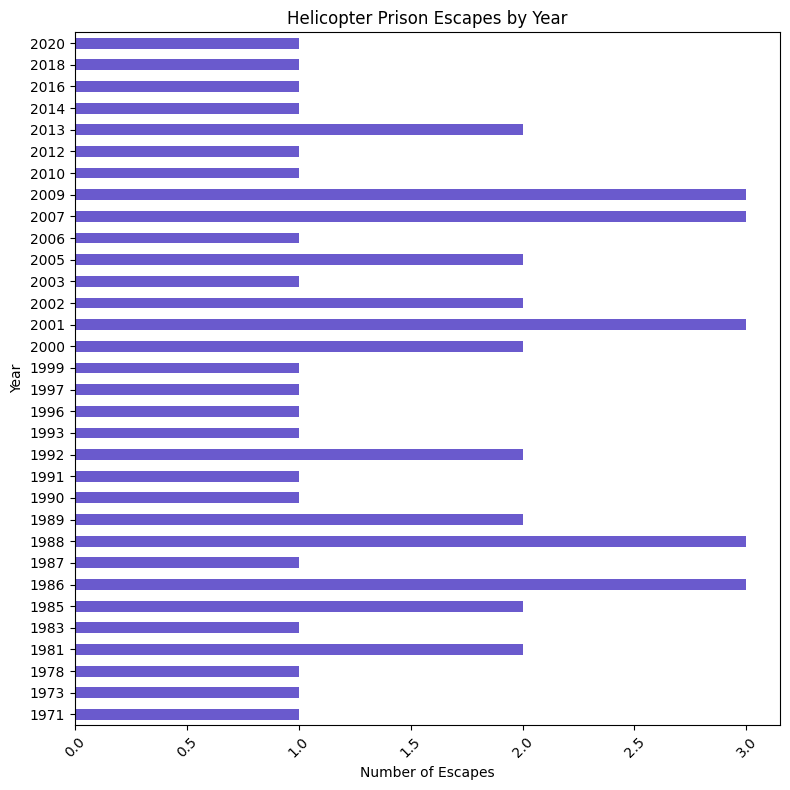

In [ ]:
import matplotlib.pyplot as plt

year_counts.plot(kind='barh', color='slateblue', figsize=(8, 8))
plt.ylabel("Year")
plt.xlabel("Number of Escapes")
plt.title("Helicopter Prison Escapes by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

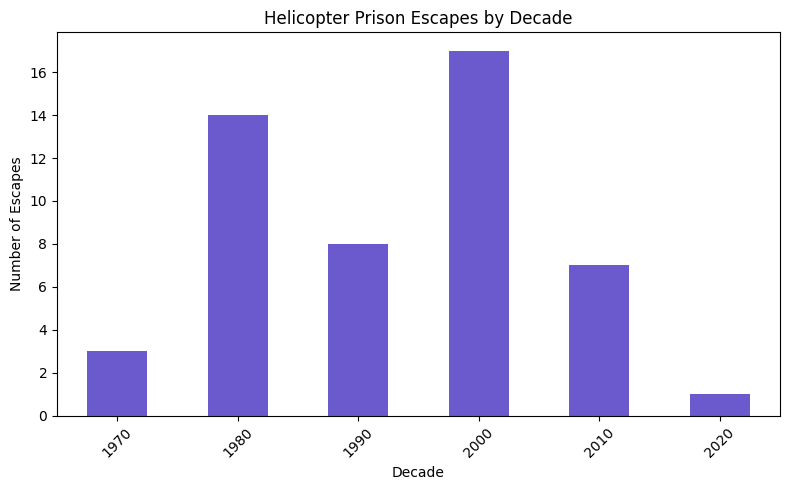

In [ ]:

decade_counts.plot(kind='bar', color='slateblue', figsize=(8, 5))
plt.xlabel("Decade")
plt.ylabel("Number of Escapes")
plt.title("Helicopter Prison Escapes by Decade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

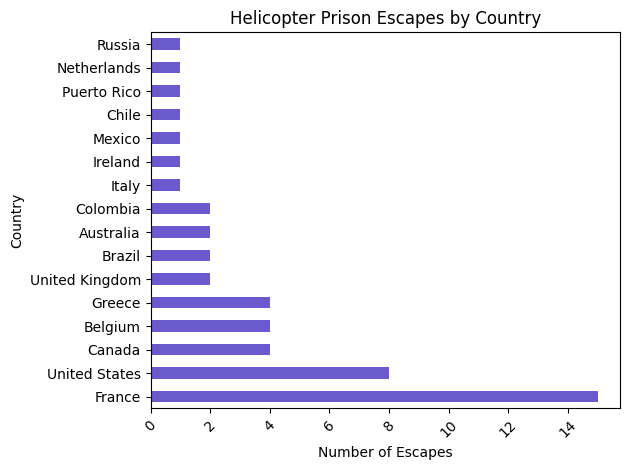

In [ ]:
# analyzing escapes by country
countries_frequency = df["Country"].value_counts()

countries_frequency.plot(kind='barh', color='slateblue')
plt.ylabel("Country")
plt.xlabel("Number of Escapes")
plt.title("Helicopter Prison Escapes by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# analyzing success rates of helicopter crashes by country

df['Succeeded'] = df['Succeeded'].str.strip().str.lower()  # to lowercase, no spaces

# Total attempts per country
total_attempts = df.groupby('Country').size()

# Successful escapes per country
successful_escapes = df[df['Succeeded'] == 'yes'].groupby('Country').size()

# Combine into a DataFrame
success_rate_df = pd.DataFrame({
    'Total Attempts': total_attempts,
    'Successful Escapes': successful_escapes
})

# Fill NaN (countries with 0 successes) with 0
success_rate_df['Successful Escapes'] = success_rate_df['Successful Escapes'].fillna(0)

# Add success rate column
success_rate_df['Success Rate (%)'] = (success_rate_df['Successful Escapes'] / success_rate_df['Total Attempts']) * 100

print(success_rate_df.sort_values(by='Success Rate (%)', ascending=False))


                Total Attempts  Successful Escapes  Success Rate (%)
Country                                                             
Brazil                       2                 2.0        100.000000
Chile                        1                 1.0        100.000000
Colombia                     2                 2.0        100.000000
Russia                       1                 1.0        100.000000
Puerto Rico                  1                 1.0        100.000000
Mexico                       1                 1.0        100.000000
Italy                        1                 1.0        100.000000
Ireland                      1                 1.0        100.000000
Canada                       4                 3.0         75.000000
United States                8                 6.0         75.000000
France                      15                11.0         73.333333
Belgium                      4                 2.0         50.000000
Greece                       4    

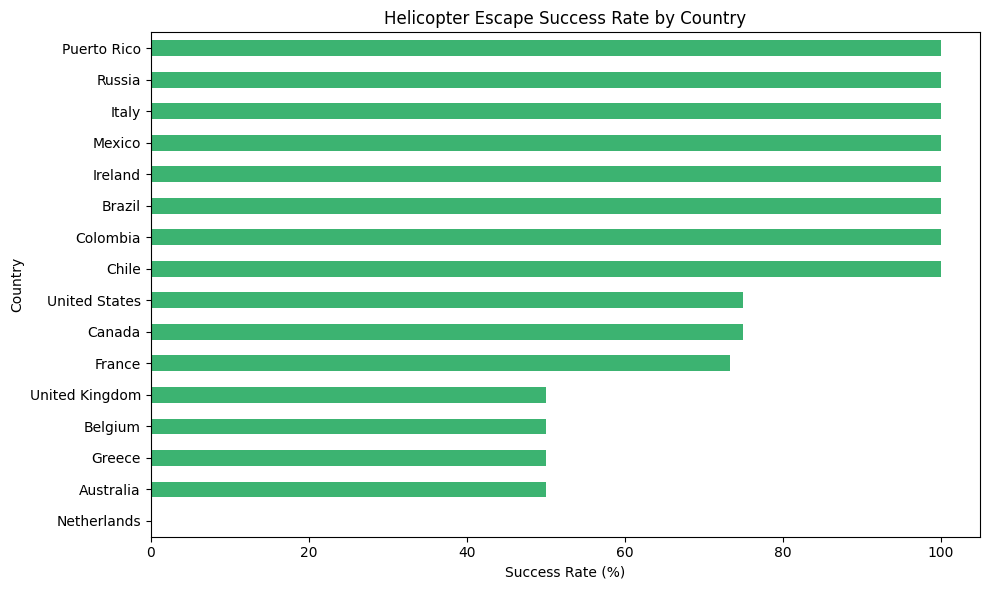

In [ ]:
import matplotlib.pyplot as plt

# Plot success rate
success_rate_df['Success Rate (%)'].sort_values().plot(kind='barh', figsize=(10, 6), color='mediumseagreen')
plt.xlabel("Success Rate (%)")
plt.title("Helicopter Escape Success Rate by Country")
plt.tight_layout()
plt.show()

In [ ]:
# Handle multiple escapees (split by comma or line breaks)
df["Num Escapees"] = df["Escapee(s)"].apply(lambda x: len(str(x).replace('\n', ',').split(',')))

print(df.head())

                Date                                  Prison Name  \
0    August 19, 1971                        Santa Martha Acatitla   
1   October 31, 1973                         Mountjoy Jail,Dublin   
2       May 24, 1978  United States Penitentiary, Marion,Illinois   
3  February 27, 1981         Fleury-Mérogis,Essonne,Ile de France   
4        May 7, 1981               Orsainville Prison,Quebec City   

         Country Succeeded                                         Escapee(s)  \
0         Mexico       yes  Joel David Kaplan\nCarlos Antonio Contreras Ca...   
1        Ireland       yes            JB O'Hagan\nSeamus Twomey\nKevin Mallon   
2  United States        no  Garrett Brock Trapnell\nMartin Joseph McNally\...   
3         France       yes                      Gérard Dupré\nDaniel Beaumont   
4         Canada        no  Marina Paquet (hijacker)\nGiles Arseneault (pr...   

   Year  Decade  Num Escapees  
0  1971    1970             2  
1  1973    1970             3  
2 

In [ ]:
df['Succeeded'] = df['Succeeded'].map({'yes': 1, 'no': 0})
grouped = df.groupby("Num Escapees")["Succeeded"].agg(['count', 'sum'])
grouped.columns = ["Total Attempts", "Successful Escapes"]
grouped["Success Rate (%)"] = (grouped["Successful Escapes"] / grouped["Total Attempts"]) * 100

print(grouped)

              Total Attempts  Successful Escapes  Success Rate (%)
Num Escapees                                                      
1                         25                  14         56.000000
2                         14                  12         85.714286
3                         10                   9         90.000000
5                          1                   1        100.000000


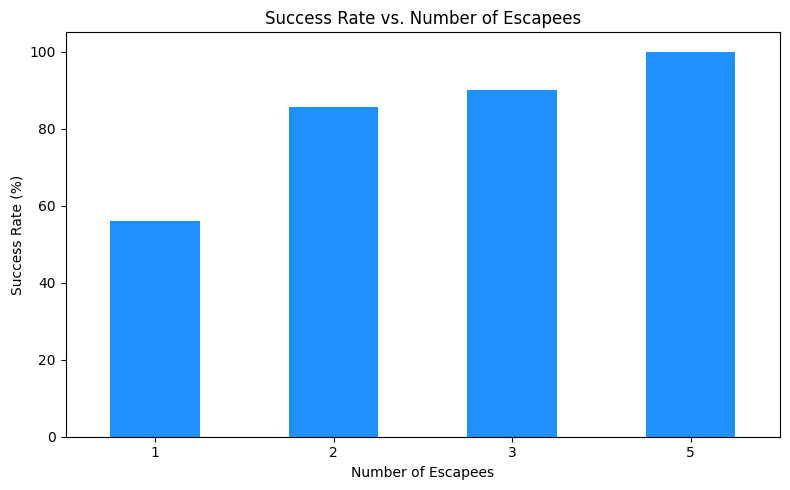

In [ ]:
import matplotlib.pyplot as plt

grouped["Success Rate (%)"].plot(kind="bar", color="dodgerblue", figsize=(8, 5))
plt.title("Success Rate vs. Number of Escapees")
plt.xlabel("Number of Escapees")
plt.ylabel("Success Rate (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Patterns in repeat escapees

In [ ]:
# Expand rows: one row per escapee
df['Escapee(s)'] = df['Escapee(s)'].str.replace('\n', ',')  # if line breaks are used
df['Escapee(s)'] = df['Escapee(s)'].str.replace('—', '')  # Handle NaN
df['Escapee(s)'] = df['Escapee(s)'].fillna('')  # Handle NaN

df_expanded = df.assign(Escapee=df['Escapee(s)'].str.split(',')).explode('Escapee(s)')

# Clean whitespace
df_expanded['Escapee(s)'] = df_expanded['Escapee(s)'].str.strip()
df_expanded = df_expanded[df_expanded['Escapee(s)'] != '']

print(df_expanded.head())


                Date                                  Prison Name  \
0    August 19, 1971                        Santa Martha Acatitla   
1   October 31, 1973                         Mountjoy Jail,Dublin   
2       May 24, 1978  United States Penitentiary, Marion,Illinois   
3  February 27, 1981         Fleury-Mérogis,Essonne,Ile de France   
4        May 7, 1981               Orsainville Prison,Quebec City   

         Country  Succeeded  \
0         Mexico          1   
1        Ireland          1   
2  United States          0   
3         France          1   
4         Canada          0   

                                          Escapee(s)  Year  Decade  \
0  Joel David Kaplan,Carlos Antonio Contreras Castro  1971    1970   
1              JB O'Hagan,Seamus Twomey,Kevin Mallon  1973    1970   
2  Garrett Brock Trapnell,Martin Joseph McNally,J...  1978    1970   
3                       Gérard Dupré,Daniel Beaumont  1981    1980   
4  Marina Paquet (hijacker),Giles Arseneault (pr

In [ ]:
escapee_counts = df_expanded['Escapee(s)'].value_counts()
repeat_escapees = escapee_counts[escapee_counts > 1]
print(repeat_escapees)

Escapee(s)
Pascal Payet      2
Michel Vaujour    2
Name: count, dtype: int64


In [ ]:
df_repeat = df_expanded[df_expanded['Escapee(s)'].isin(repeat_escapees.index)]
print(df_repeat)

                Date                   Prison Name Country  Succeeded  \
8       May 26, 1986            Prison de la Santé  France          1   
21     June 17, 1993  TouraineCentral Prison,Tours  France          0   
27  January 19, 2001                 Luynes prison  France          1   
37     July 15, 2007                  Grasseprison  France          1   

        Escapee(s)  Year  Decade  Num Escapees           Escapee  
8   Michel Vaujour  1986    1980             1  [Michel Vaujour]  
21  Michel Vaujour  1993    1990             1  [Michel Vaujour]  
27    Pascal Payet  2001    2000             1    [Pascal Payet]  
37    Pascal Payet  2007    2000             1    [Pascal Payet]  


In [ ]:
# Escape counts by name
print(df_repeat.groupby('Escapee(s)').size())

Escapee(s)
Michel Vaujour    2
Pascal Payet      2
dtype: int64


In [ ]:
# Success pattern per repeat escapee
print(df_repeat.groupby(['Escapee(s)', 'Succeeded']).size())

Escapee(s)      Succeeded
Michel Vaujour  0            1
                1            1
Pascal Payet    1            2
dtype: int64


In [ ]:
# By country
print(df_repeat.groupby(['Escapee(s)', 'Country']).size())

Escapee(s)      Country
Michel Vaujour  France     2
Pascal Payet    France     2
dtype: int64


In [ ]:
# By decade or year
print(df_repeat.groupby(['Escapee(s)', 'Decade']).size())

Escapee(s)      Decade
Michel Vaujour  1980      1
                1990      1
Pascal Payet    2000      2
dtype: int64


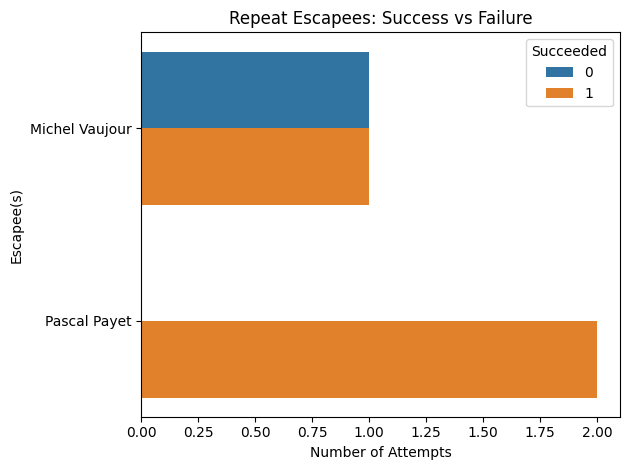

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_repeat, y='Escapee(s)', hue='Succeeded')
plt.title('Repeat Escapees: Success vs Failure')
plt.xlabel('Number of Attempts')
plt.tight_layout()
plt.show()


In [90]:
from google.colab import userdata
api_key = userdata.get('GOOGLE_API_KEY')


In [98]:
import google.generativeai as genai
import time
from tenacity import retry, stop_after_attempt, before_sleep_log
import logging
from functools import lru_cache
import sys

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Global cache for prison security levels
prison_security_cache = {}

@retry(
    stop=stop_after_attempt(3),
    before_sleep=before_sleep_log(logger, logging.INFO)
)
def gemini_api_call(prison_name: str) -> str:
    """
    Call Gemini API with fixed delay to avoid rate limiting.
    """
    prompt = (
        f"Classify the security level of the prison named '{prison_name}'. "
        "The options are: Maximum, Medium, Minimum, or Unknown. "
        "Provide only one of these as the answer."
    )

    try:
        model = genai.GenerativeModel('gemini-2.0-flash')
        response = model.generate_content(prompt)
        result = response.text.strip()

        # Force wait after successful API call to avoid rate limiting
        logger.info(f"API call successful. Waiting 5 seconds before next call...")
        time.sleep(5)

        return result
    except Exception as e:
        logger.error(f"Error calling Gemini API: {str(e)}")
        raise

def infer_prison_security(prison_name: str) -> str:
    """
    Infer the security level of a prison with caching and rate limiting protection.

    Args:
        prison_name: Name of the prison (possibly with location)

    Returns:
        String indicating security level: "Maximum", "Medium", "Minimum", or "Unknown"
    """
    # Normalize the prison name for consistent caching
    normalized_name = prison_name.strip().lower()

    # Check cache first
    if normalized_name in prison_security_cache:
        logger.info(f"Cache hit for '{prison_name}'")
        return prison_security_cache[normalized_name]

    logger.info(f"Cache miss for '{prison_name}'. Making API call...")

    try:
        result = gemini_api_call(prison_name)

        # Validate and normalize the response
        valid_responses = {"maximum", "medium", "minimum", "unknown"}
        normalized_result = result.lower().strip()

        if normalized_result not in valid_responses:
            # If result doesn't match expected values, default to "Unknown"
            logger.warning(f"Invalid response from API: '{result}'. Defaulting to 'Unknown'")
            final_result = "Unknown"
        else:
            # Capitalize first letter for consistent output format
            final_result = normalized_result.capitalize()

        # Store in cache
        prison_security_cache[normalized_name] = final_result
        return final_result

    except Exception as e:
        logger.error(f"Failed to determine security level for '{prison_name}': {str(e)}")
        return "Unknown"

In [99]:
import pandas as pd
import time
from tqdm import tqdm  # For progress tracking

def classify_prison_security_in_dataframe(df, prison_name_column="Prison Name"):
    """
    Apply prison security classification to all prisons in a dataframe and
    store results in a new column called 'Prison Security'.

    Args:
        df: Pandas DataFrame containing prison data
        prison_name_column: Name of the column containing prison names (default: 'Prison Name')

    Returns:
        DataFrame with added 'Prison Security' column
    """
    # Check if the prison name column exists
    if prison_name_column not in df.columns:
        raise ValueError(f"Column '{prison_name_column}' not found in DataFrame")

    # Create a copy to avoid modifying the original DataFrame
    result_df = df.copy()

    # Initialize the new column with 'Unknown'
    result_df['Prison Security'] = 'Unknown'

    # Process each prison, showing progress with tqdm
    print(f"Processing {len(df)} prison records...")

    # Get unique prison names to avoid redundant API calls for duplicates
    unique_prisons = df[prison_name_column].unique()
    unique_results = {}

    # Process unique prisons first with a progress bar
    for prison_name in tqdm(unique_prisons, desc="Classifying prisons"):
        if prison_name and isinstance(prison_name, str):
            security_level = infer_prison_security(prison_name)
            unique_results[prison_name] = security_level

    # Map the results to the DataFrame
    result_df['Prison Security'] = result_df[prison_name_column].map(
        lambda x: unique_results.get(x, 'Unknown') if isinstance(x, str) else 'Unknown'
    )

    print(f"Security classification complete. Classified {len(unique_results)} unique prisons.")

    # Summary of classifications
    security_counts = result_df['Prison Security'].value_counts()
    print("\nClassification Summary:")
    for level, count in security_counts.items():
        print(f"  {level}: {count}")

    return result_df

In [100]:
# Process the DataFrame
result_df = classify_prison_security_in_dataframe(df)

print("\nDataFrame with security classifications:")
print(result_df)

Processing 50 prison records...


Classifying prisons: 100%|██████████| 46/46 [04:35<00:00,  5.99s/it]

Security classification complete. Classified 46 unique prisons.

Classification Summary:
  Unknown: 27
  Maximum: 15
  Medium: 8

DataFrame with security classifications:
                  Date                                        Prison Name  \
0      August 19, 1971                              Santa Martha Acatitla   
1     October 31, 1973                               Mountjoy Jail,Dublin   
2         May 24, 1978        United States Penitentiary, Marion,Illinois   
3    February 27, 1981               Fleury-Mérogis,Essonne,Ile de France   
4          May 7, 1981                     Orsainville Prison,Quebec City   
5        January, 1983                              Pentridge (HM Prison)   
6    December 19, 1985  Perry Correctional Institution,Pelzer, South C...   
7    December 31, 1985  Cândido Mendes penitentiary,Ilha Grande,Rio de...   
8         May 26, 1986                                 Prison de la Santé   
9     November 5, 1986  Federal Correctional Institution, D

In [101]:
print(list(result_df.columns.values))

['Date', 'Prison Name', 'Country', 'Succeeded', 'Escapee(s)', 'Year', 'Decade', 'Num Escapees', 'Security Level', 'Prison Security']


In [102]:
# summarising prison and security level
prison_summary = result_df.groupby(['Prison Name', 'Prison Security']).agg({
    'Date': 'count',  # Count of escape incidents
    'Succeeded': 'sum',  # Number of successful escapes
    'Num Escapees': 'sum'  # Total number of escapees
}).reset_index()

# Rename columns for clarity
prison_summary.rename(columns={
    'Date': 'Escape Incidents',
    'Succeeded': 'Successful Escapes'
}, inplace=True)

# Calculate success rate
prison_summary['Success Rate'] = (prison_summary['Successful Escapes'] /
                                  prison_summary['Escape Incidents']) * 100

print(prison_summary)

                                          Prison Name Prison Security  \
0                                        Aiton Prison         Unknown   
1      Arkansas Valley Correctional Facility,Colorado         Maximum   
2                                              Bruges         Unknown   
3                   Cárcel Bellavista,Bello, Colombia         Unknown   
4   Cândido Mendes penitentiary,Ilha Grande,Rio de...         Unknown   
5                                 De Geerhorst prison         Unknown   
6                             Domenjod Prison,Réunion         Unknown   
7                                   Draguignan prison          Medium   
8   Federal Correctional Institution, Dublin, Cali...          Medium   
9            Federal Holding Facility, Miami, Florida         Unknown   
10               Fleury-Mérogis,Essonne,Ile de France         Maximum   
11                             Forestprison, Brussels         Unknown   
12                                             Fran

In [104]:
security_summary = result_df.groupby('Prison Security').agg({
    'Prison Name': pd.Series.nunique,  # Count unique prisons
    'Date': 'count',  # Count of escape incidents
    'Succeeded': ['sum', 'mean'],  # Sum and average of successful escapes
    'Num Escapees': ['sum', 'mean']  # Sum and average of escapees
}).reset_index()

# Flatten multi-level column names
security_summary.columns = ['Prison Security', 'Unique Prisons', 'Total Incidents',
                            'Total Successful', 'Success Rate',
                            'Total Escapees', 'Avg Escapees per Incident']

print(security_summary)

  Prison Security  Unique Prisons  Total Incidents  Total Successful  \
0         Maximum              14               15                12   
1          Medium               7                8                 8   
2         Unknown              25               27                16   

   Success Rate  Total Escapees  Avg Escapees per Incident  
0      0.800000              29                   1.933333  
1      1.000000              16                   2.000000  
2      0.592593              43                   1.592593  


In [106]:
from scipy import stats

# Statistical testing
# Prepare data for statistical tests: Success rate by security level
test_data = {}
for level in result_df['Prison Security'].unique():
    if pd.notna(level):  # Skip NaN values
        level_data = result_df[result_df['Prison Security'] == level]['Succeeded'].values
        if len(level_data) > 0:
            test_data[level] = level_data

# ANOVA test if we have at least 2 groups
anova_results = None
if len(test_data) >= 2:
    groups = list(test_data.values())
    f_val, p_val = stats.f_oneway(*groups)
    anova_results = {
        'f_value': f_val,
        'p_value': p_val,
        'significant': p_val < 0.05
    }

print(anova_results)

{'f_value': np.float64(3.0604651162790706), 'p_value': np.float64(0.05630622072423246), 'significant': np.False_}


In [108]:
'''
What does the results mean:
Looking at your ANOVA results:

```
{'f_value': np.float64(3.0604651162790706),
 'p_value': np.float64(0.05630622072423246),
 'significant': np.False_}
```

Here's what this means:

1. **F-value (3.06)**: This moderate F-value indicates there are some differences between your security level groups, but they're not extremely large. The F-value represents the ratio of between-group variance to within-group variance.

2. **P-value (0.056)**: This is just slightly above the conventional significance threshold (0.05). This means your result is approaching significance but doesn't quite meet the traditional cutoff.

3. **Significant (False)**: Based on the conventional p < 0.05 threshold, the test concludes the differences are not statistically significant.

What this means in practical terms:
- There appears to be some relationship between prison security levels and escape success rates in your data
- However, the evidence isn't quite strong enough to definitively conclude that security level affects escape success rates
- This is a "borderline" result - with a p-value of 0.056, it's very close to being significant
- With a slightly larger sample size or slightly larger differences between groups, this might have crossed the significance threshold

This kind of borderline result can be interpreted as "suggestive evidence" rather than definitive evidence. In your report, you might phrase it as:

"The ANOVA test revealed differences in escape success rates between security levels that approached statistical significance (F = 3.06, p = 0.056). While not meeting the conventional threshold for statistical significance, these results suggest a potential relationship between prison security level and escape outcomes that may warrant further investigation with larger datasets."

Given how close your p-value is to 0.05, it would be worth examining your data visualization to see if any particular security level appears to stand out from the others.
'''

'\nWhat does the results mean:\nLooking at your ANOVA results:\n\n```\n{\'f_value\': np.float64(3.0604651162790706), \n \'p_value\': np.float64(0.05630622072423246), \n \'significant\': np.False_}\n```\n\nHere\'s what this means:\n\n1. **F-value (3.06)**: This moderate F-value indicates there are some differences between your security level groups, but they\'re not extremely large. The F-value represents the ratio of between-group variance to within-group variance.\n\n2. **P-value (0.056)**: This is just slightly above the conventional significance threshold (0.05). This means your result is approaching significance but doesn\'t quite meet the traditional cutoff.\n\n3. **Significant (False)**: Based on the conventional p < 0.05 threshold, the test concludes the differences are not statistically significant.\n\nWhat this means in practical terms:\n- There appears to be some relationship between prison security levels and escape success rates in your data\n- However, the evidence isn\'t 

In [110]:
# 5. Time-based analysis by decade
decade_analysis = None
if 'Decade' in result_df.columns:
    decade_analysis = result_df.groupby(['Decade', 'Prison Security']).agg({
        'Date': 'count',
        'Succeeded': ['sum', 'mean'],
        'Num Escapees': 'sum'
    }).reset_index()

    # Flatten column names
    decade_analysis.columns = ['Decade', 'Prison Security', 'Incidents',
                              'Successful', 'Success Rate', 'Total Escapees']

print(decade_analysis)

    Decade Prison Security  Incidents  Successful  Success Rate  \
0     1970         Maximum          2           1      0.500000   
1     1970          Medium          1           1      1.000000   
2     1980         Maximum          6           5      0.833333   
3     1980          Medium          3           3      1.000000   
4     1980         Unknown          5           3      0.600000   
5     1990         Maximum          2           2      1.000000   
6     1990         Unknown          6           3      0.500000   
7     2000         Maximum          4           3      0.750000   
8     2000          Medium          3           3      1.000000   
9     2000         Unknown         10           8      0.800000   
10    2010         Maximum          1           1      1.000000   
11    2010          Medium          1           1      1.000000   
12    2010         Unknown          5           2      0.400000   
13    2020         Unknown          1           0      0.00000

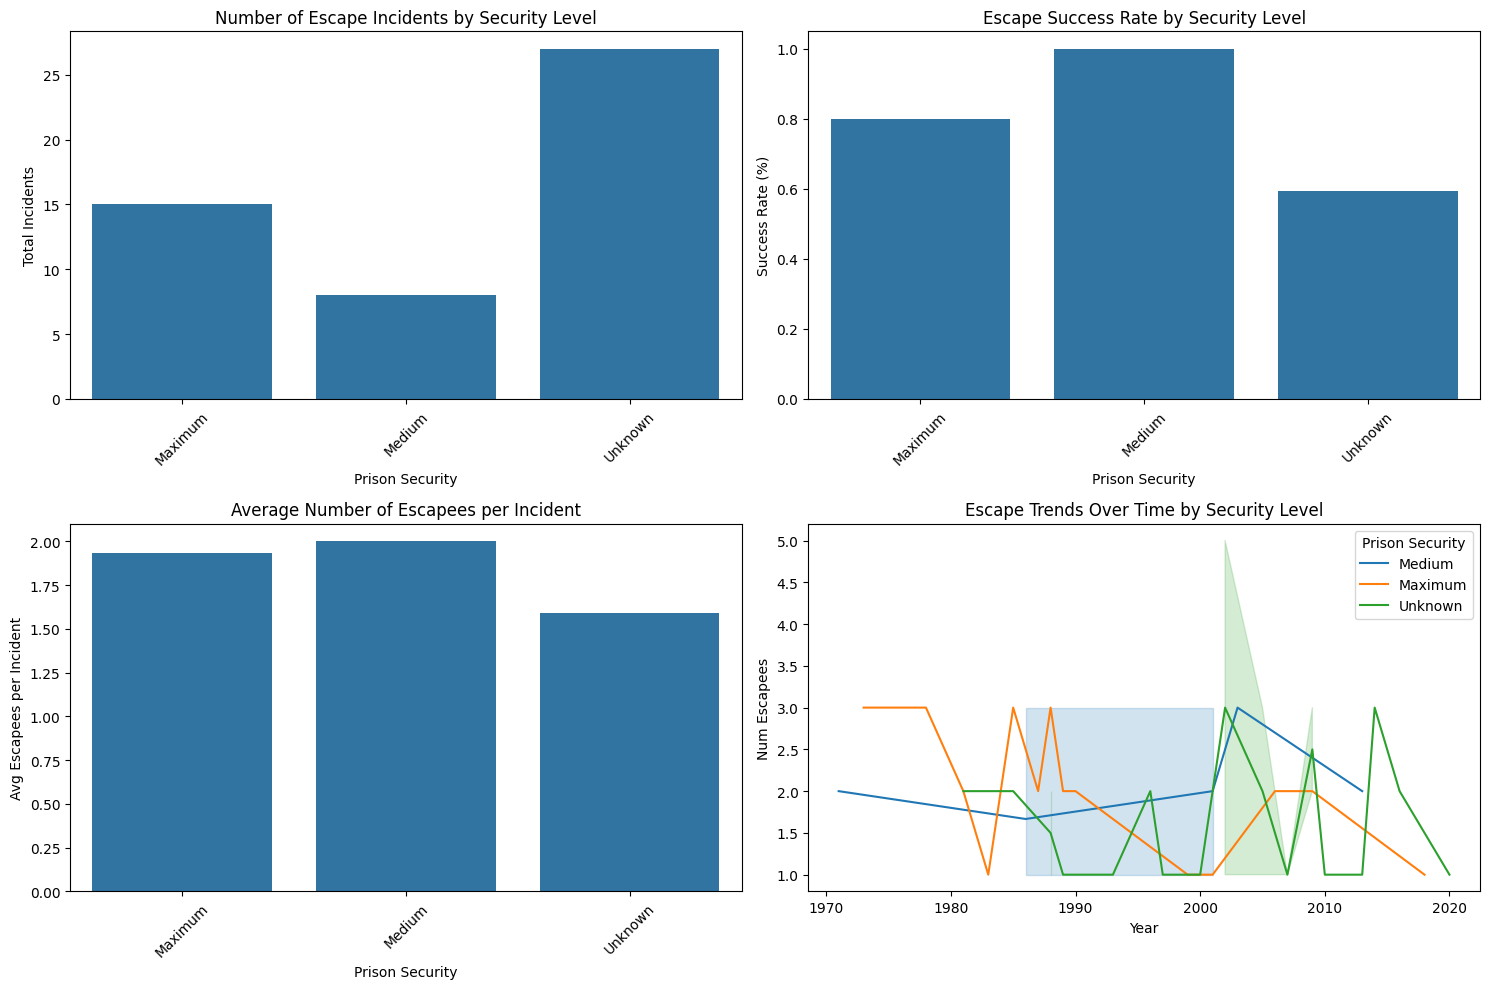

In [112]:
# 4. Create visualizations
plt.figure(figsize=(15, 10))

# 4.1 Bar chart of escape incidents by security level
plt.subplot(2, 2, 1)
sns.barplot(x='Prison Security', y='Total Incidents', data=security_summary)
plt.title('Number of Escape Incidents by Security Level')
plt.xticks(rotation=45)

# 4.2 Success rate by security level
plt.subplot(2, 2, 2)
sns.barplot(x='Prison Security', y='Success Rate', data=security_summary)
plt.title('Escape Success Rate by Security Level')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)

# 4.3 Number of escapees per incident by security level
plt.subplot(2, 2, 3)
sns.barplot(x='Prison Security', y='Avg Escapees per Incident', data=security_summary)
plt.title('Average Number of Escapees per Incident')
plt.xticks(rotation=45)

# 4.4 Distribution of escape incidents over time by security level
plt.subplot(2, 2, 4)
if 'Year' in df.columns:
    sns.lineplot(data=result_df, x='Year', y='Num Escapees', hue='Prison Security')
    plt.title('Escape Trends Over Time by Security Level')
else:
    plt.text(0.5, 0.5, 'Year data not available for time trend analysis',
            ha='center', va='center')

plt.tight_layout()